# Ryan Arneson-----AST 4031-----Homework #2

In [2]:
%matplotlib inline

## #1 a)

In [3]:
from astropy.io import fits
from matplotlib import pyplot as p
import numpy as n
import scipy.integrate as integ
import scipy.stats as stats
from numpy import *
import scipy.optimize as opt

hdulist = fits.open('test_correlation.fits')
#data in form 
data = hdulist[0].data
hdulist.close()
pairs = n.shape(data)[0]
#seperate all the x's and y's
x = data[:,0]
y = data[:,1]
#calculate the Pearson's correlation coefficient and p value
r_p, p_p = stats.pearsonr(x,y)
#compute the Spearman's correlation coefficient and p value
r_s, p_s = stats.spearmanr(x,y)
#compute the Kendall tau coefficient and p value
tau, p_t = stats.kendalltau(x,y)
#the significance levels are:
print "Pearson Coefficient", r_p 
print "Significane (Pearson)", p_p
print "Spearman Coefficient:", r_s
print "Significance (Spearman)", p_s 
print "tau coefficient (Kendall)", tau 
print "Significane (Kendall):", p_t

Pearson Coefficient 0.866061349685
Significane (Pearson) 1.58541001819e-61
Spearman Coefficient: 0.860888022201
Significance (Spearman) 5.16118011944e-60
tau coefficient (Kendall) 0.665728643216
Significane (Kendall): 1.56616473481e-44


If the variables were uncorrelated (null hypothesis) the probability that these values arose by chance is around 1e-61, 1e-60, and 1e-44 for the Pearson, Spearman, and Kendall tests respectively.  In other words, it is extremely unlikely that these variables are uncorrelated. 

## b)

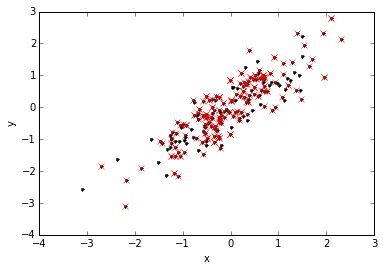

In [4]:
def bootstrap(x,y):
    """
    PURPOSE: draws a bootstrap sample from x and y arrays

    ARGUMENTS:
        x: 1d array
        y: (matching) 1d array
    RETURNS: bootstrapped arrays x,y
    """
    num = n.size(x)
    boot_x = n.zeros(num)
    boot_y = n.zeros(num)
    for i in range(num):
        j = n.random.randint(num)
        boot_x[i] = x[j]
        boot_y[i] = y[j]
    return [boot_x, boot_y]

b1 = bootstrap(x,y)
p.plot(x,y,'k.') #original sample
p.plot(b1[0],b1[1], 'rx') #bootstrap sample
p.xlabel('x')
p.ylabel('y')

The black dots mark the original data points, the red x's mark the data points of the bootstrap sample.  As expected, the bootstrap sample doesn't include all of the data points from the original sample and some data points are repeated.

## c)

In [5]:
boot_mc = n.zeros((1000,2,200))
for i in range(1000):
    boot_mc[i] = bootstrap(x,y)
r_p = n.zeros(1000)
r_s = n.zeros(1000)
tau = n.zeros(1000)
for i in range(1000):
    r_p[i] = stats.pearsonr(boot_mc[i][0],boot_mc[i][1])[0]
    r_s[i] = stats.spearmanr(boot_mc[i][0],boot_mc[i][1])[0]
    tau[i] = stats.kendalltau(boot_mc[i][0],boot_mc[i][1])[0]

## d)

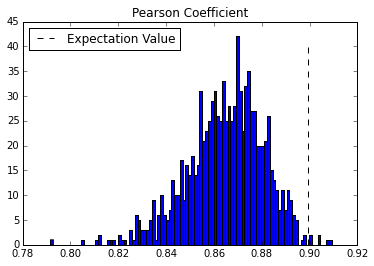

In [6]:
#Pearsons coefficient
p.hist(r_p,bins=100)
#expectation value of r is rho*(1-(1-rho^2)/N)
#from the covariance matrix rho = 0.9
Er = 0.9*(1.-((1.-.9**2)/n.size(x)))
p.plot((Er,Er),(0,40),"k--",label='Expectation Value')
p.title('Pearson Coefficient')
p.legend(loc=2)

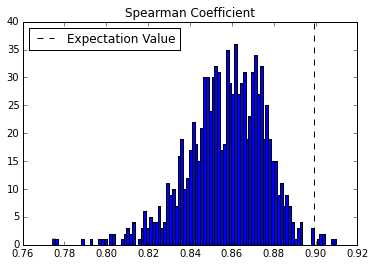

In [7]:
#Spearman Coefficient
p.hist(r_s,bins=100)
p.plot((Er,Er),(0,40),"k--",label='Expectation Value')
p.title('Spearman Coefficient')
p.legend(loc=2)

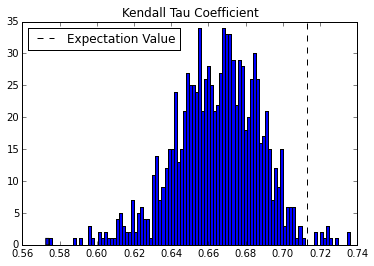

In [8]:
#Kendall
#the expectation value of tau is 2/pi*arcsin(rho)
Etau = (2./n.pi)*n.arcsin(0.9)
p.hist(tau,bins=100)
p.plot((Etau,Etau),(0,35),'k--',label='Expectation Value')
p.title('Kendall Tau Coefficient')
p.legend(loc=2)

## e)

In [9]:
#add in some outliers
x2 = n.concatenate((x,[-0.6,-0.76,-2.0]))
y2 = n.concatenate((y,[-2.1,0.92,-5.0]))
boot_mc2 = n.zeros((1000,2,203))
for i in range(1000):
    boot_mc2[i] = bootstrap(x2,y2)
#recalculate the coefficients
r_p2 = n.zeros(1000)
r_s2 = n.zeros(1000)
tau2 = n.zeros(1000)
for i in range(1000):
    r_p2[i] = stats.pearsonr(boot_mc2[i][0],boot_mc2[i][1])[0]
    r_s2[i] = stats.spearmanr(boot_mc2[i][0],boot_mc2[i][1])[0]
    tau2[i] = stats.kendalltau(boot_mc2[i][0],boot_mc2[i][1])[0]

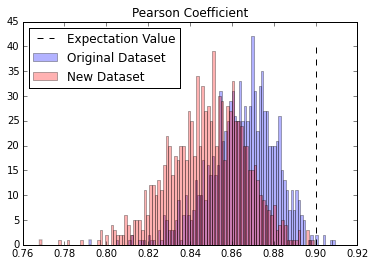

In [10]:
p.hist(r_p,bins=100,alpha =0.3, color='blue',label='Original Dataset')
p.hist(r_p2,bins=100,alpha =0.3, color='red',label = 'New Dataset')
p.plot((.9,.9),(0,40),"k--",label='Expectation Value')
p.legend(loc=2)
p.title('Pearson Coefficient')

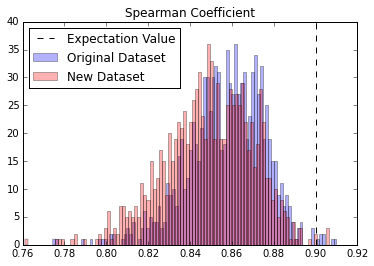

In [11]:
p.hist(r_s,bins=100,alpha =0.3, color='blue',label='Original Dataset')
p.hist(r_s2,bins=100,alpha =0.3, color='red',label = 'New Dataset')
p.plot((.9,.9),(0,40),"k--",label='Expectation Value')
p.legend(loc=2)
p.title('Spearman Coefficient')

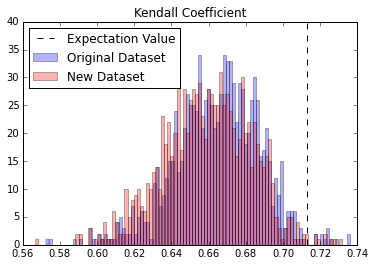

In [12]:
p.hist(tau,bins=100,alpha =0.3, color='blue',label='Original Dataset')
p.hist(tau2,bins=100,alpha =0.3, color='red',label = 'New Dataset')
p.plot((Etau,Etau),(0,40),"k--",label='Expectation Value')
p.legend(loc=2)
p.title('Kendall Coefficient')

Adding the outliers shifts all of the distributions away to lower coefficient values (i.e. away from the expectation values).  The outliers make the variables less correlated.

## #2 a)

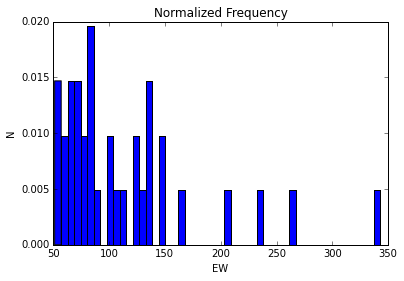

In [13]:
ew_data =loadtxt('EW_Ouchi2007.dat')
p.hist(ew_data,bins=50,normed=1)
p.xlabel('EW')
p.ylabel('N')
p.title('Normalized Frequency')

## b)

Calculating the probability of observing a given EW given $W_0$

$prob(EW) = \frac{dN}{dEW} = k e^{-\frac{EW}{W_0}}$

$\int_{50}^{\infty} \! \frac{dN}{dEW} = 1$

$\int_{50}^{\infty}  k e^{-\frac{EW}{W_0}} dEW = 1$

$\left. k W_0 e^{-\frac{EW}{W_0}} \right|_{50}^{\infty} = 1$

$k W_O e^{-\frac{50}{W_0}} = 1 $ 

$k = \frac{1}{W_0} e^{\frac{50}{W_0}}$

$P(EW\mid W_0) = \frac{1}{W_0} e^{\frac{50-EW}{W_0}}$

## c)

Calculating the maximum likelihood value of $W_0$ analytically:

$L = \prod\limits_{i}^{n} \frac{1}{W_0} e^{\frac{50-EW_i}{W_0}}$

$ln(L) = \sum\limits_{i}^{n} ln(\frac{1}{W_0} e^{\frac{50-EW_i}{W_0}})$

$ln(L) = \sum\limits_{i}^{n} ln(\frac{1}{W_0}) + \frac{50-EW_i}{W_0}$

$ln(L) = \sum\limits_{i}^{n} ln(\frac{1}{W_0}) + \frac{50-EW_i}{W_0}$

$\frac{\partial ln(L)}{\partial W_0} = \sum\limits_{i}^{n} \frac{-1}{W_0} - \frac{50-EW_i}{W_0^2} = 0$

$W_0 = \sum\limits_{i}^{n}EW_i - 50 = \frac{\sum\limits_{i}^{n} EW_i}{n} - 50$

The maximum likelihood value of $W_0$ is just the mean of the sample minus 50.0

Best estimate of Wo: 63.63


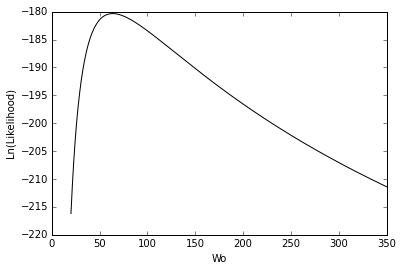

In [14]:
#define the pdf
def Lya_PDF(Wo, EW):
    return 1./(Wo*n.exp(-50./Wo)) * n.exp( - EW/Wo)
#define the log likelihood
def logl(Wo,data):
    pxs = n.log(Lya_PDF(Wo, ew_data))
    return n.sum((pxs))
#use ML to find best estimate for Wo
Wos = n.arange(20.0,350.,0.01)
lls = n.zeros(n.size(Wos))
for i in range(n.size(Wos)):
    lls[i] = logl(Wos[i],ew_data)
Wo = Wos[n.argmax(lls)]
p.plot(Wos,lls,'k-')
p.xlabel('Wo')
p.ylabel('Ln(Likelihood)')
print "Best estimate of Wo:", Wo

## d)

-sigma Wo: 9.65
+sigma Wo: 12.08
Average sigma Wo 10.865


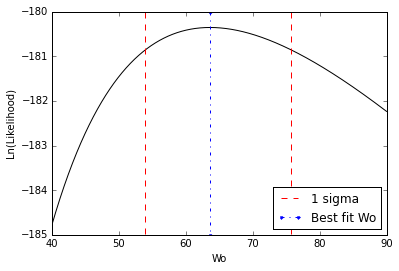

In [15]:
#graphic method we want to find where Ln(L) is lower by 1/2
def find_nearest_element(array,value,index=False):
    """Return closest value in array, or its index"""
    idx = n.abs(array-value).argmin()
    return (idx,array.flat[idx]) if index else array.flat[idx]
max_index = find_nearest_element(lls,(n.max(lls)),index=True)[0]
#Wo minus 1 sigma
Wo_msigma = Wos[find_nearest_element(lls[0:max_index],(n.max(lls)-.5),index=True)[0]]
Wo_psigma = Wos[find_nearest_element(lls[max_index:7000],(n.max(lls)-.5),index=True)[0]+max_index]
    #sigma of Wo
p.plot(Wos[2000:7000],lls[2000:7000],'k-')
p.plot((Wo_msigma,Wo_msigma),(-180,-185),'r--',label='1 sigma')
p.plot((Wo_psigma,Wo_psigma),(-180,-185),'r--')
p.plot((Wo,Wo),(-180,-185),'b.-.',label="Best fit Wo")
p.xlabel('Wo')
p.ylabel('Ln(Likelihood)')
p.legend(loc=4)
print "-sigma Wo:", Wo-Wo_msigma
print "+sigma Wo:", Wo_psigma-Wo
print "Average sigma Wo", (Wo_psigma-Wo_msigma)/2.0

Bootstrap sigma Wo: 10.5614178634


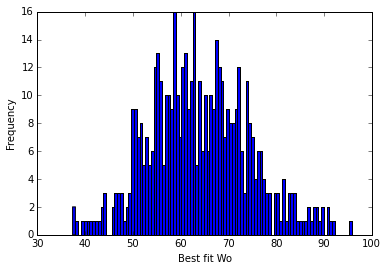

In [16]:
#using the bootstrap method
def bootstrap_wo(data):
    """
    PURPOSE: runs a ML bootstrap sample to estimate error on Wo

    ARGUMENTS:
        data: data to bootstrap

    RETURNS: ML estimates of Wo
    """
    ew_boot = n.zeros(n.size(data))
    for i in range(n.size(data)):
        j = n.random.randint(n.size(data))
        ew_boot[i] = data[j]
    return ew_boot
#need n(log(n)**2) ~ 445 bootstraps
#analytical result for Wo is n.mean(ew_data) - 50.0
Wo_ML = n.zeros(500)
for k in range(500):
    bootstrap_data = bootstrap_wo(ew_data)
    Wo_ML[k] = (n.sum(bootstrap_data)/n.size(bootstrap_data))-50.0
p.hist(Wo_ML,bins=100);
p.xlabel('Best fit Wo')
p.ylabel('Frequency')
print "Bootstrap sigma Wo:", n.std(Wo_ML)

The bootstrap method returns a value sligthly lower than the average sigma calculated from the graphical method.